# <h1><font color='blue'>PROJETO DE QUALIDADE DE VIDA<font><h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("Quality_of_Life.csv", sep=",")

In [3]:
df.isnull().sum()

country                                0
Purchasing Power Value                 0
Purchasing Power Category             46
Safety Value                           0
Safety Category                        2
Health Care Value                      0
Health Care Category                  15
Climate Value                          0
Climate Category                     122
Cost of Living Value                   0
Cost of Living Category               45
Property Price to Income Value         0
Property Price to Income Category     21
Traffic Commute Time Value             0
Traffic Commute Time Category         29
Pollution Value                        0
Pollution Category                    10
Quality of Life Value                  0
Quality of Life Category             122
dtype: int64

In [4]:
df.dtypes

country                               object
Purchasing Power Value               float64
Purchasing Power Category             object
Safety Value                         float64
Safety Category                       object
Health Care Value                    float64
Health Care Category                  object
Climate Value                        float64
Climate Category                      object
Cost of Living Value                 float64
Cost of Living Category               object
Property Price to Income Value        object
Property Price to Income Category     object
Traffic Commute Time Value           float64
Traffic Commute Time Category         object
Pollution Value                      float64
Pollution Category                    object
Quality of Life Value                 object
Quality of Life Category              object
dtype: object

In [5]:
translate = {
    "country": "País",
    "Purchasing Power Value": "Valor do Poder de Compra",
    "Purchasing Power Category": "Categoria do Poder de Compra",
    "Safety Value": "Valor da Segurança",
    "Safety Category": "Categoria da Segurança",
    "Health Care Value": "Valor do Cuidado com a Saúde",
    "Health Care Category": "Categoria do Cuidado com a Saúde",
    "Climate Value": "Valor do Clima",
    "Climate Category": "Categoria do Clima",
    "Cost of Living Value": "Valor do Custo de Vida",
    "Cost of Living Category": "Categoria do Custo de Vida",
    "Property Price to Income Value": "Valor da Relação Preço da Propriedade/Renda",
    "Property Price to Income Category": "Categoria da Relação Preço da Propriedade/Renda",
    "Traffic Commute Time Value": "Valor do Tempo de Deslocamento no Trânsito",
    "Traffic Commute Time Category": "Categoria do Tempo de Deslocamento no Trânsito",
    "Pollution Value": "Valor da Poluição",
    "Pollution Category": "Categoria da Poluição",
    "Quality of Life Value": "Valor da Qualidade de Vida",
    "Quality of Life Category": "Categoria da Qualidade de Vida"
}

df.rename(columns=translate, inplace=True)

In [6]:
def corrige_dados(df):
 for col in df.columns:
    if df[col].dtypes == object:
        if col == 'Valor da Qualidade de Vida' or col == 'Valor da Relação Preço da Propriedade/Renda':
            df[col] = df[col].replace("'", "", regex=True).replace(":", "", regex=True).replace(",", "", regex=True)
            df[col] = df[col].astype("float64", errors='ignore')
            df[col] = df[col].fillna("0.0")
        else:
            df[col] = df[col].fillna("No Data")
            df[col] = df[col].replace("'", "", regex=True).replace(":", "", regex=True)
    else:
        df[col] = df[col].fillna("0.0")

corrige_dados(df)

In [7]:
df.describe()

,Valor do Poder de Compra,Valor da Segurança,Valor do Cuidado com a Saúde,Valor do Clima,Valor do Custo de Vida,Valor da Relação Preço da Propriedade/Renda,Valor do Tempo de Deslocamento no Trânsito,Valor da Poluição,Valor da Qualidade de Vida
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,55.573305,55.274449,54.731568,37.598178,37.526314,42.463347,28.492966,54.266186,63.466780
std,52.008245,16.914298,20.607381,40.851542,26.026565,206.595460,17.347242,25.853695,73.307577
min,0.000000,0.000000,0.000000,-3.540000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.340000,43.857500,45.807500,0.000000,24.550000,6.480000,17.100000,35.700000,0.000000
50%,42.930000,54.635000,57.150000,0.000000,36.895000,11.720000,29.845000,59.765000,0.000000
75%,85.940000,68.132500,68.447500,79.332500,51.090000,18.130000,38.870000,73.740000,127.135000
max,281.830000,100.000000,100.000000,99.890000,137.370000,2746.000000,100.000000,106.900000,224.310000


In [8]:
df.head()

,País,Valor do Poder de Compra,Categoria do Poder de Compra,Valor da Segurança,Categoria da Segurança,Valor do Cuidado com a Saúde,Categoria do Cuidado com a Saúde,Valor do Clima,Categoria do Clima,Valor do Custo de Vida,Categoria do Custo de Vida,Valor da Relação Preço da Propriedade/Renda,Categoria da Relação Preço da Propriedade/Renda,Valor do Tempo de Deslocamento no Trânsito,Categoria do Tempo de Deslocamento no Trânsito,Valor da Poluição,Categoria da Poluição,Valor da Qualidade de Vida,Categoria da Qualidade de Vida
0,Afghanistan,32.15,Very Low,25.33,Low,24.24,Low,0.00,No Data,21.08,Very Low,7.80,Low,56.17,Very High,84.44,Very High,0.00,No Data
1,Aland Islands,125.01,Very High,71.81,High,79.72,High,0.00,No Data,53.44,Low,5.33,Low,19.05,Very Low,18.05,Very Low,0.00,No Data
2,Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low
3,Alderney,0.00,No Data,83.79,Very High,100.00,Very High,0.00,No Data,0.00,No Data,0.00,No Data,5.00,Very Low,1.72,Very Low,0.00,No Data
4,Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,63.87,High,98.83,Very Low


In [9]:
for col in df.columns:
    if df[col].eq("No Data").any():
        print(f'O valor "No Data" foi encontrado na coluna: {col}')

O valor "No Data" foi encontrado na coluna: Categoria do Poder de Compra
O valor "No Data" foi encontrado na coluna: Categoria da Segurança
O valor "No Data" foi encontrado na coluna: Categoria do Cuidado com a Saúde
O valor "No Data" foi encontrado na coluna: Categoria do Clima
O valor "No Data" foi encontrado na coluna: Categoria do Custo de Vida
O valor "No Data" foi encontrado na coluna: Categoria da Relação Preço da Propriedade/Renda
O valor "No Data" foi encontrado na coluna: Categoria do Tempo de Deslocamento no Trânsito
O valor "No Data" foi encontrado na coluna: Categoria da Poluição
O valor "No Data" foi encontrado na coluna: Categoria da Qualidade de Vida


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   País                                             236 non-null    object 
 1   Valor do Poder de Compra                         236 non-null    float64
 2   Categoria do Poder de Compra                     236 non-null    object 
 3   Valor da Segurança                               236 non-null    float64
 4   Categoria da Segurança                           236 non-null    object 
 5   Valor do Cuidado com a Saúde                     236 non-null    float64
 6   Categoria do Cuidado com a Saúde                 236 non-null    object 
 7   Valor do Clima                                   236 non-null    float64
 8   Categoria do Clima                               236 non-null    object 
 9   Valor do Custo de Vida          

In [11]:
for i in df.columns:
    if df[i].dtypes == object:
        df.drop(columns={i}, inplace=True)
print(f"Fim do drop de colunas não relacionais para correlacionamento")

Fim do drop de colunas não relacionais para correlacionamento


In [12]:
df['Valor do Poder de Compra'].describe()

count    236.000000
mean      55.573305
std       52.008245
min        0.000000
25%       16.340000
50%       42.930000
75%       85.940000
max      281.830000
Name: Valor do Poder de Compra, dtype: float64

C:\Users\Fillipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Valor do Custo de Vida', ylabel='Count'>

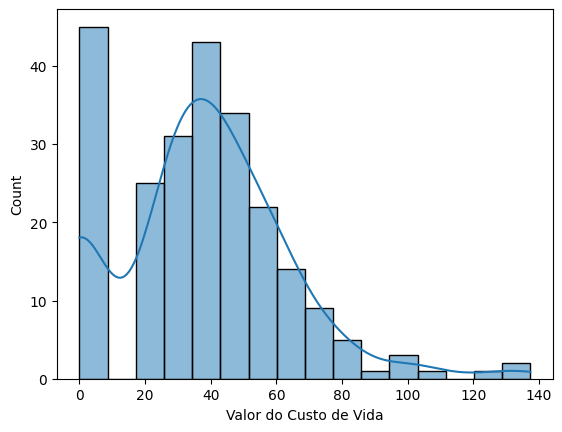

In [13]:
sns.histplot(data = df, x = "Valor do Custo de Vida", kde = True)

In [27]:
df.corr()

,Valor do Poder de Compra,Valor da Segurança,Valor do Cuidado com a Saúde,Valor do Clima,Valor do Custo de Vida,Valor da Relação Preço da Propriedade/Renda,Valor do Tempo de Deslocamento no Trânsito,Valor da Poluição,Valor da Qualidade de Vida
Valor do Poder de Compra,1.000000,0.333808,0.377624,0.274323,0.604519,-0.130004,0.141160,-0.159466,0.497247
Valor da Segurança,0.333808,1.000000,0.359591,0.104646,0.112718,-0.134195,-0.234681,-0.368183,0.262312
Valor do Cuidado com a Saúde,0.377624,0.359591,1.000000,0.357213,0.291672,-0.093326,0.093304,-0.133587,0.417268
Valor do Clima,0.274323,0.104646,0.357213,1.000000,0.143284,-0.041780,0.377823,0.054523,0.854063
Valor do Custo de Vida,0.604519,0.112718,0.291672,0.143284,1.000000,0.276213,0.173599,-0.075541,0.240114
Valor da Relação Preço da Propriedade/Renda,-0.130004,-0.134195,-0.093326,-0.041780,0.276213,1.000000,0.015994,0.094249,-0.124597
Valor do Tempo de Deslocamento no Trânsito,0.141160,-0.234681,0.093304,0.377823,0.173599,0.015994,1.000000,0.365080,0.272102
Valor da Poluição,-0.159466,-0.368183,-0.133587,0.054523,-0.075541,0.094249,0.365080,1.000000,-0.109723
Valor da Qualidade de Vida,0.497247,0.262312,0.417268,0.854063,0.240114,-0.124597,0.272102,-0.109723,1.000000


<Axes: xlabel='Valor do Poder de Compra', ylabel='Valor do Custo de Vida'>

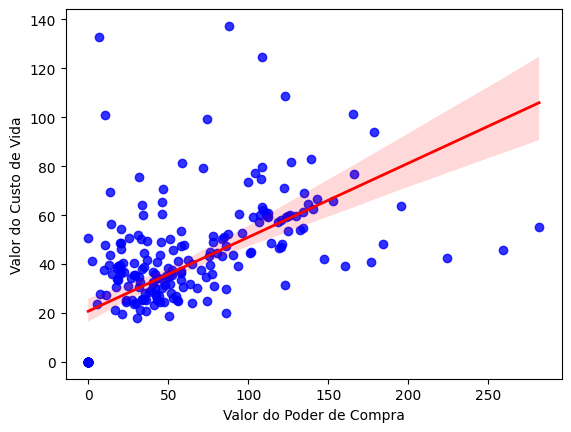

In [ ]:
sns.regplot(data=df, x="Valor do Poder de Compra", y="Valor do Custo de Vida", 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

In [34]:
X = df['Valor do Poder de Compra']
y = df['Valor do Custo de Vida']

X = sm.add_constant(X)

modelo = sm.OLS(y, X)

In [36]:
resultado = modelo.fit()
print(resultado.summary())

                              OLS Regression Results                              
Dep. Variable:     Valor do Custo de Vida   R-squared:                       0.365
Model:                                OLS   Adj. R-squared:                  0.363
Method:                     Least Squares   F-statistic:                     134.8
Date:                    Tue, 21 Jan 2025   Prob (F-statistic):           6.63e-25
Time:                            22:08:56   Log-Likelihood:                -1049.9
No. Observations:                     236   AIC:                             2104.
Df Residuals:                         234   BIC:                             2111.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------